In [ ]:
# 한글 깨짐
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치후 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,417 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
# 경고 메시지 지우기
import warnings

def warn_func():
    warn_message = 'warn_func() is deprecated, use new_function() instead' 
    warnings.warn(warn_message)

warn_func()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: warn_func() is deprecated, use new_function() instead
  


In [ ]:
# 데이터 불러오기
hjd_df = pd.read_csv('/content/drive/MyDrive/입지선정데이터/clustering/클러스터링데이터.csv', encoding='cp949')
hjd_df

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,11110530,1101053,종로구 사직동,종로구,사직동,1834,0.042984,0,10.845083,30.0
1,11110540,1101054,종로구 삼청동,종로구,삼청동,641,0.047104,2,2.304008,5.0
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5
3,11110560,1101056,종로구 평창동,종로구,평창동,3407,0.073161,6,9.793059,10.0
4,11110570,1101057,종로구 무악동,종로구,무악동,1380,0.067539,2,1.380764,0.0
...,...,...,...,...,...,...,...,...,...,...
420,11740690,1125070,강동구 둔촌1동,강동구,둔촌1동,33,0.063380,8,9.741961,0.0
421,11740700,1125071,강동구 둔촌2동,강동구,둔촌2동,4059,0.085714,6,12.585027,2.5
422,11740570,1125072,강동구 암사1동,강동구,암사1동,5913,0.065827,9,8.065850,15.0
423,11740610,1125073,강동구 천호2동,강동구,천호2동,5922,0.069275,15,12.503307,10.0


In [ ]:
# 결측값 확인
hjd_df.isnull().sum()

행정동코드      0
읍면동코드      0
자치행정동      0
자치구        0
행정동        0
거주인구수      0
낮생활인구비율    0
총노인시설수     0
접근성지표      0
이용편리지표     0
dtype: int64

In [ ]:
# target 행정동 지정
hjd_df['target'] = 0
target_d = ['부암동', '중곡3동', '전농1동', '망우3동', '돈암1동', '장위2동', '역촌동', '홍제3동', '서림동', '반포본동', '일원1동', '오륜동', '잠실7동', '성내3동']
for i in range(0,len(target_d)):
    hjd_df.loc[hjd_df['행정동'] == target_d[i],'target'] = 1
hjd_df[hjd_df['target']==1]

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1
69,11215760,1105057,광진구 중곡3동,광진구,중곡3동,2793,0.069232,1,6.141288,2.5,1
86,11230560,1106083,동대문구 전농1동,동대문구,전농1동,5478,0.070116,2,29.408644,5.0,1
104,11260660,1107068,중랑구 망우3동,중랑구,망우3동,3331,0.071612,2,5.219833,10.0,1
110,11290580,1108058,성북구 돈암1동,성북구,돈암1동,2845,0.072408,1,7.842188,0.0,1
123,11290770,1108077,성북구 장위2동,성북구,장위2동,3065,0.076337,1,9.430095,5.0,1
191,11380625,1112074,은평구 역촌동,은평구,역촌동,8267,0.059541,3,10.657260,5.0,1
194,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동,3617,0.077748,2,8.889985,10.0,1
328,11620665,1121066,관악구 서림동,관악구,서림동,3458,0.055268,1,6.357287,0.0,1
345,11650550,1122056,서초구 반포본동,서초구,반포본동,1867,0.064034,1,9.202020,5.0,1


In [ ]:
hjd_df_plot = hjd_df[['거주인구수','낮생활인구비율','총노인시설수','접근성지표','이용편리지표']]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(

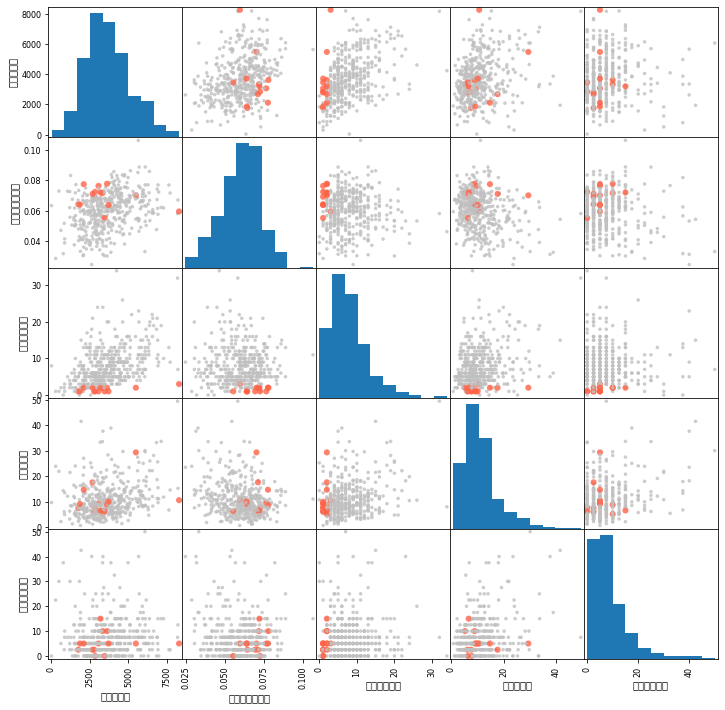

In [ ]:
# 데이터 분포 확인
color_wheel = {1: "silver", 
               2: "tomato"}
colors = hjd_df["target"].map(lambda x: color_wheel.get(x + 1))
ax = pd.plotting.scatter_matrix(hjd_df_plot, color=colors, alpha=0.8, s=(hjd_df['target']+0.5)*100, figsize=(12, 12), diagonal='hist')

In [ ]:
# 상관계수 행렬
hjd_df_cor = hjd_df[['거주인구수','낮생활인구비율','총노인시설수','접근성지표','이용편리지표']]
corr = hjd_df_cor.corr(method = 'pearson')

corr

,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
거주인구수,1.000000,0.325639,0.449034,0.263270,0.060493
낮생활인구비율,0.325639,1.000000,-0.028263,-0.237683,-0.109605
총노인시설수,0.449034,-0.028263,1.000000,0.248215,0.001985
접근성지표,0.263270,-0.237683,0.248215,1.000000,0.270585
이용편리지표,0.060493,-0.109605,0.001985,0.270585,1.000000


In [ ]:
# 거주인구수 제거
clu_data = hjd_df[['낮생활인구비율','총노인시설수','접근성지표','이용편리지표']]
clu_data.head()

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,0.042984,0,10.845083,30.0
1,0.047104,2,2.304008,5.0
2,0.064248,1,7.574081,2.5
3,0.073161,6,9.793059,10.0
4,0.067539,2,1.380764,0.0


In [ ]:
# 정규화
from sklearn.preprocessing import minmax_scale

clu_data_n = minmax_scale(clu_data)
clu_data_n

array([[0.2243736 , 0.        , 0.20717951, 0.6       ],
       [0.27487464, 0.05882353, 0.03179583, 0.1       ],
       [0.48501624, 0.02941176, 0.14001228, 0.05      ],
       ...,
       [0.50436063, 0.26470588, 0.15011032, 0.3       ],
       [0.54662392, 0.44117647, 0.24122973, 0.2       ],
       [0.57556453, 0.26470588, 0.28562478, 0.05      ]])

In [ ]:
clu_data['낮생활인구비율'] = [row[0] for row in clu_data_n]
clu_data['총노인시설수'] = [row[1] for row in clu_data_n]
clu_data['접근성지표'] = [row[2] for row in clu_data_n]
clu_data['이용편리지표'] = [row[3] for row in clu_data_n]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
clu_data.head()

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,0.224374,0.000000,0.207180,0.60
1,0.274875,0.058824,0.031796,0.10
2,0.485016,0.029412,0.140012,0.05
3,0.594257,0.176471,0.185577,0.20
4,0.525346,0.058824,0.012838,0.00


In [ ]:
clu_data = (clu_data*100).round(1)

In [ ]:
clu_data.head()

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표
0,22.4,0.0,20.7,60.0
1,27.5,5.9,3.2,10.0
2,48.5,2.9,14.0,5.0
3,59.4,17.6,18.6,20.0
4,52.5,5.9,1.3,0.0


In [ ]:
clu_data.shape

(425, 4)

### pca

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(clu_data)
df_pca

array([[ 26.91211251, -45.63486122,   3.93621727],
       [-11.74266993, -17.03308438, -19.47429028],
       [-19.27714647, -11.85767481,  -5.1971521 ],
       ...,
       [  2.13622584,  -4.52719641,  14.27360687],
       [  5.69771344,  17.27152438,  15.61169742],
       [ -7.23119301,  11.45455273,   6.86186729]])

In [ ]:
clu_data['pca1'] = [row[0] for row in df_pca]
clu_data['pca2'] = [row[1] for row in df_pca]
clu_data['pca3'] = [row[2] for row in df_pca]

In [ ]:
clu_data_pca = clu_data[['pca1','pca2','pca3']]
clu_data_pca.head()

,pca1,pca2,pca3
0,26.912113,-45.634861,3.936217
1,-11.742670,-17.033084,-19.474290
2,-19.277146,-11.857675,-5.197152
3,-8.597259,-4.784628,14.692669
4,-30.483787,-8.059042,-4.788926


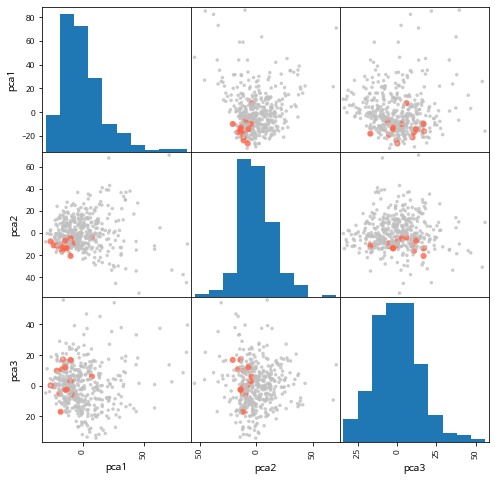

In [ ]:
# 차원축소후 분포 확인
color_wheel = {1: "silver", 
               2: "tomato"}
colors = hjd_df['target'].map(lambda x: color_wheel.get(x + 1))
ax = pd.plotting.scatter_matrix(clu_data_pca, color=colors, alpha=0.8, s=(hjd_df['target']+0.5)*100, figsize=(8, 8), diagonal='hist')

warnings.filterwarnings(action='ignore')

## 1. K-means

In [ ]:
# X = clu_data.iloc[:, [0,1,2]].astype("int")
X = clu_data_pca.iloc[:, [0,1,2]].astype("int")
y = hjd_df['target'] # y 값은 군집에서 사용하지 않는다

from sklearn.cluster import KMeans

model = KMeans(5)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = model.labels_
# labels

In [ ]:
plot_df = X
plot_df['y'] = y
plot_df['p'] = labels
plot_df

,pca1,pca2,pca3,y,p
0,26,-45,3,0,2
1,-11,-17,-19,0,1
2,-19,-11,-5,1,3
3,-8,-4,14,0,0
4,-30,-8,-4,0,3
...,...,...,...,...,...
420,-12,8,-5,0,3
421,-21,6,19,0,3
422,2,-4,14,0,0
423,5,17,15,0,4


In [ ]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

In [ ]:
plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

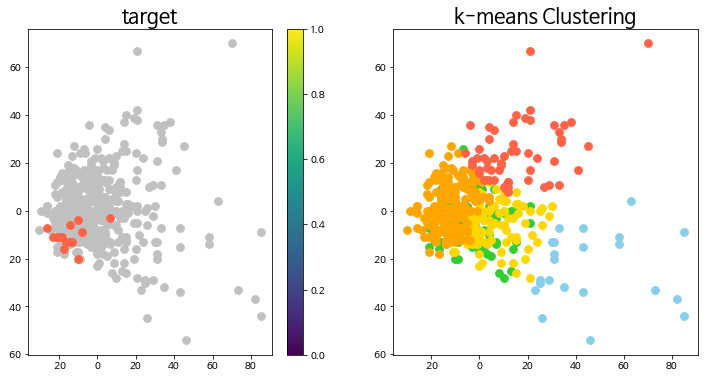

In [ ]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
# plt.colorbar()

plt.subplot(1,2,2)
plt.title('k-means Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="gold", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="skyblue", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="orange", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="tomato", s=60)

# plt.colorbar()

In [ ]:
hjd_df['kmeansP'] = plot_df['p']

In [ ]:
hjd_df[hjd_df['target']==1]

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target,kmeansP
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1,3
69,11215760,1105057,광진구 중곡3동,광진구,중곡3동,2793,0.069232,1,6.141288,2.5,1,3
86,11230560,1106083,동대문구 전농1동,동대문구,전농1동,5478,0.070116,2,29.408644,5.0,1,0
104,11260660,1107068,중랑구 망우3동,중랑구,망우3동,3331,0.071612,2,5.219833,10.0,1,0
110,11290580,1108058,성북구 돈암1동,성북구,돈암1동,2845,0.072408,1,7.842188,0.0,1,3
123,11290770,1108077,성북구 장위2동,성북구,장위2동,3065,0.076337,1,9.430095,5.0,1,3
191,11380625,1112074,은평구 역촌동,은평구,역촌동,8267,0.059541,3,10.657260,5.0,1,3
194,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동,3617,0.077748,2,8.889985,10.0,1,0
328,11620665,1121066,관악구 서림동,관악구,서림동,3458,0.055268,1,6.357287,0.0,1,3
345,11650550,1122056,서초구 반포본동,서초구,반포본동,1867,0.064034,1,9.202020,5.0,1,3


In [ ]:
len(hjd_df[hjd_df['kmeansP']==4])

157

In [ ]:
len(hjd_df[hjd_df['target']==1])

14

In [ ]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['kmeansP']==4)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동코드','읍면동코드','자치행정동','자치구','행정동']]
hjd_final

,행정동코드,읍면동코드,자치행정동,자치구,행정동
0,11110550,1101055,종로구 부암동,종로구,부암동
1,11215760,1105057,광진구 중곡3동,광진구,중곡3동
2,11260660,1107068,중랑구 망우3동,중랑구,망우3동
3,11290580,1108058,성북구 돈암1동,성북구,돈암1동
4,11290770,1108077,성북구 장위2동,성북구,장위2동
5,11380625,1112074,은평구 역촌동,은평구,역촌동
6,11620665,1121066,관악구 서림동,관악구,서림동
7,11650550,1122056,서초구 반포본동,서초구,반포본동
8,11710566,1124059,송파구 오륜동,송파구,오륜동
9,11740660,1125067,강동구 성내3동,강동구,성내3동


In [ ]:
clu_data_s[(clu_data_s['자치행정동'] == hjd_final['자치행정동'][0]) | (clu_data_s['자치행정동'] == hjd_final['자치행정동'][1]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][2]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][3]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][4]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][5]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][6]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][7]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][8]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][9]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][10]) |(clu_data_s['자치행정동'] == hjd_final['자치행정동'][11]) ]

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,자치행정동,score
2,48.5,2.9,14.0,5.0,종로구 부암동,17.600
69,54.6,2.9,11.1,5.0,광진구 중곡3동,18.400
104,57.5,5.9,9.2,20.0,중랑구 망우3동,23.150
110,58.5,2.9,14.6,0.0,성북구 돈암1동,19.000
123,63.3,2.9,17.8,10.0,성북구 장위2동,23.500
191,42.7,8.8,20.3,10.0,은평구 역촌동,20.450
194,65.0,5.9,16.7,20.0,서대문구 홍제3동,26.900
328,37.5,2.9,11.5,0.0,관악구 서림동,12.975
345,48.2,2.9,17.3,10.0,서초구 반포본동,19.600
372,58.0,5.9,12.1,30.0,강남구 일원1동,26.500


## 2. Hierachical

In [ ]:
X = clu_data.iloc[:,4:]
X

,pca1,pca2,pca3
0,26.912113,-45.634861,3.936217
1,-11.742670,-17.033084,-19.474290
2,-19.277146,-11.857675,-5.197152
3,-8.597259,-4.784628,14.692669
4,-30.483787,-8.059042,-4.788926
...,...,...,...
420,-12.046863,8.294849,-5.172900
421,-21.010877,6.280165,19.141764
422,2.136226,-4.527196,14.273607
423,5.697713,17.271524,15.611697


In [ ]:
data = X.values

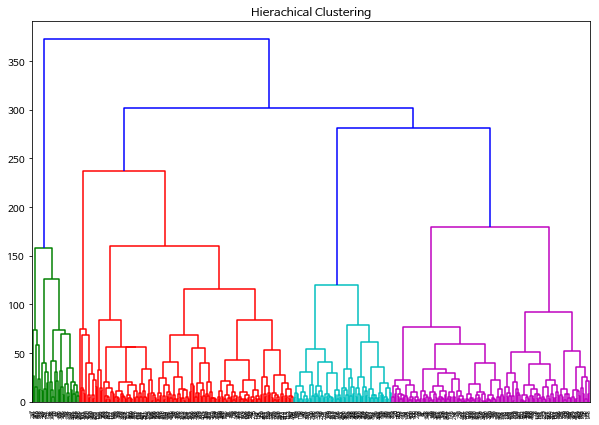

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Hierachical Clustering")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 3, 0,
       1, 1, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 3, 0, 2, 2,
       3, 3, 1, 1, 2, 1, 1, 3, 2, 2, 0, 2, 3, 3, 3, 1, 3, 0, 3, 2, 2, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2,
       2, 2, 2, 3, 2, 0, 0, 0, 0, 2, 3, 0, 0, 1, 2, 0, 0, 4, 2, 2, 2, 1,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 0, 0, 0, 3, 3, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 4, 2, 2, 4, 2, 0, 3, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 4, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 2, 1, 3, 1, 0, 3, 3, 2, 1, 2, 3,
       2, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 0, 0, 2, 2, 4, 1, 0, 1, 0, 4, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 4, 2, 2, 3, 3, 4, 0, 2, 0, 3, 4, 2, 3, 0,
       2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 1, 3, 2, 3, 0, 0, 2, 0, 2, 3, 0, 0, 0, 2,

In [ ]:
plot_df = X
plot_df['y'] = y
plot_df['p'] = cluster.fit_predict(data)
plot_df

,pca1,pca2,pca3,y,p
0,26.912113,-45.634861,3.936217,0,1
1,-11.742670,-17.033084,-19.474290,0,0
2,-19.277146,-11.857675,-5.197152,1,0
3,-8.597259,-4.784628,14.692669,0,0
4,-30.483787,-8.059042,-4.788926,0,0
...,...,...,...,...,...
420,-12.046863,8.294849,-5.172900,0,2
421,-21.010877,6.280165,19.141764,0,2
422,2.136226,-4.527196,14.273607,0,0
423,5.697713,17.271524,15.611697,0,2


In [ ]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

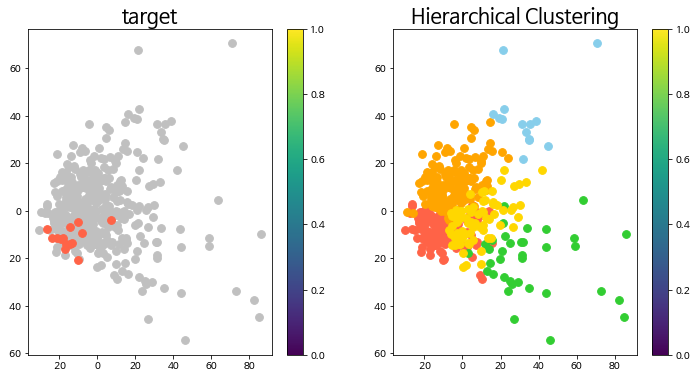

In [ ]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
# plt.colorbar()

plt.subplot(1,2,2)
plt.title('Hierarchical Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="tomato", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="orange", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="gold", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="skyblue", s=60)

# plt.colorbar()

In [ ]:
hjd_df['hierarchicalP'] = cluster.fit_predict(data)
hjd_df

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target,kmeansP,hierarchicalP
0,11110530,1101053,종로구 사직동,종로구,사직동,1834,0.042984,0,10.845083,30.0,0,0,1
1,11110540,1101054,종로구 삼청동,종로구,삼청동,641,0.047104,2,2.304008,5.0,0,4,0
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1,4,0
3,11110560,1101056,종로구 평창동,종로구,평창동,3407,0.073161,6,9.793059,10.0,0,3,0
4,11110570,1101057,종로구 무악동,종로구,무악동,1380,0.067539,2,1.380764,0.0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11740690,1125070,강동구 둔촌1동,강동구,둔촌1동,33,0.063380,8,9.741961,0.0,0,4,2
421,11740700,1125071,강동구 둔촌2동,강동구,둔촌2동,4059,0.085714,6,12.585027,2.5,0,3,2
422,11740570,1125072,강동구 암사1동,강동구,암사1동,5913,0.065827,9,8.065850,15.0,0,3,0
423,11740610,1125073,강동구 천호2동,강동구,천호2동,5922,0.069275,15,12.503307,10.0,0,2,2


In [ ]:
hjd_df[hjd_df['target']==1]

,행정동코드,읍면동코드,자치행정동,자치구,행정동,거주인구수,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,target,kmeansP,hierarchicalP
2,11110550,1101055,종로구 부암동,종로구,부암동,1763,0.064248,1,7.574081,2.5,1,4,0
69,11215760,1105057,광진구 중곡3동,광진구,중곡3동,2793,0.069232,1,6.141288,2.5,1,4,0
86,11230560,1106083,동대문구 전농1동,동대문구,전농1동,5478,0.070116,2,29.408644,5.0,1,3,0
104,11260660,1107068,중랑구 망우3동,중랑구,망우3동,3331,0.071612,2,5.219833,10.0,1,4,0
110,11290580,1108058,성북구 돈암1동,성북구,돈암1동,2845,0.072408,1,7.842188,0.0,1,4,0
123,11290770,1108077,성북구 장위2동,성북구,장위2동,3065,0.076337,1,9.430095,5.0,1,4,0
191,11380625,1112074,은평구 역촌동,은평구,역촌동,8267,0.059541,3,10.657260,5.0,1,4,0
194,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동,3617,0.077748,2,8.889985,10.0,1,3,0
328,11620665,1121066,관악구 서림동,관악구,서림동,3458,0.055268,1,6.357287,0.0,1,4,0
345,11650550,1122056,서초구 반포본동,서초구,반포본동,1867,0.064034,1,9.202020,5.0,1,4,0


In [ ]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['hierarchicalP']==0)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동코드','읍면동코드','자치행정동','자치구','행정동']]
hjd_final

,행정동코드,읍면동코드,자치행정동,자치구,행정동
0,11110550,1101055,종로구 부암동,종로구,부암동
1,11215760,1105057,광진구 중곡3동,광진구,중곡3동
2,11230560,1106083,동대문구 전농1동,동대문구,전농1동
3,11260660,1107068,중랑구 망우3동,중랑구,망우3동
4,11290580,1108058,성북구 돈암1동,성북구,돈암1동
5,11290770,1108077,성북구 장위2동,성북구,장위2동
6,11380625,1112074,은평구 역촌동,은평구,역촌동
7,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동
8,11620665,1121066,관악구 서림동,관악구,서림동
9,11650550,1122056,서초구 반포본동,서초구,반포본동


In [ ]:
hjd_final.to_csv("/content/drive/MyDrive/입지선정데이터/clustering/최종행정동.csv",encoding='cp949')

## 3. meanshift

In [ ]:
X = clu_data.iloc[:,4:]
X

,pca1,pca2,pca3
0,26.912113,-45.634861,3.936217
1,-11.742670,-17.033084,-19.474290
2,-19.277146,-11.857675,-5.197152
3,-8.597259,-4.784628,14.692669
4,-30.483787,-8.059042,-4.788926
...,...,...,...
420,-12.046863,8.294849,-5.172900
421,-21.010877,6.280165,19.141764
422,2.136226,-4.527196,14.273607
423,5.697713,17.271524,15.611697


In [ ]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 25.974


In [ ]:
from sklearn.cluster import MeanShift

meanshift= MeanShift(bandwidth=25.974)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6]


In [ ]:
import pandas as pd


clusterDF = X
clusterDF['y'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=25.974)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2 3 4 5 6]


In [ ]:
clusterDF

,pca1,pca2,pca3,y
0,26.912113,-45.634861,3.936217,0
1,-11.742670,-17.033084,-19.474290,0
2,-19.277146,-11.857675,-5.197152,1
3,-8.597259,-4.784628,14.692669,0
4,-30.483787,-8.059042,-4.788926,0
...,...,...,...,...
420,-12.046863,8.294849,-5.172900,0
421,-21.010877,6.280165,19.141764,0
422,2.136226,-4.527196,14.273607,0
423,5.697713,17.271524,15.611697,0


In [ ]:
plot_df = X
# plot_df['y'] = y
plot_df['p'] = cluster_labels
plot_df

,pca1,pca2,pca3,y,p
0,26.912113,-45.634861,3.936217,0,2
1,-11.742670,-17.033084,-19.474290,0,0
2,-19.277146,-11.857675,-5.197152,1,0
3,-8.597259,-4.784628,14.692669,0,0
4,-30.483787,-8.059042,-4.788926,0,0
...,...,...,...,...,...
420,-12.046863,8.294849,-5.172900,0,0
421,-21.010877,6.280165,19.141764,0,0
422,2.136226,-4.527196,14.273607,0,0
423,5.697713,17.271524,15.611697,0,0


In [ ]:
plot_df1 = plot_df[plot_df['y']==0]
plot_df2 = plot_df[plot_df['y']==1]

plot_df_c1 = plot_df[plot_df['p']==0]
plot_df_c2 = plot_df[plot_df['p']==1]
plot_df_c3 = plot_df[plot_df['p']==2]
plot_df_c4 = plot_df[plot_df['p']==3]
plot_df_c5 = plot_df[plot_df['p']==4]

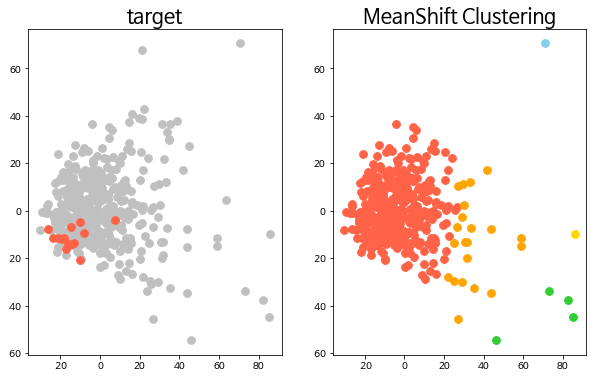

In [ ]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title('target', fontsize=20)

plt.scatter(plot_df1['pca1'], plot_df1['pca2'], c="silver", s=60)
plt.scatter(plot_df2['pca1'], plot_df2['pca2'], c="tomato", s=60)
# plt.colorbar()

plt.subplot(1,2,2)
plt.title('MeanShift Clustering', fontsize=20)
plt.scatter(plot_df_c1['pca1'], plot_df_c1['pca2'], c="tomato", s=60)
plt.scatter(plot_df_c2['pca1'], plot_df_c2['pca2'], c="limegreen", s=60)
plt.scatter(plot_df_c3['pca1'], plot_df_c3['pca2'], c="orange", s=60)
plt.scatter(plot_df_c4['pca1'], plot_df_c4['pca2'], c="gold", s=60)
plt.scatter(plot_df_c5['pca1'], plot_df_c5['pca2'], c="skyblue", s=60)

# plt.colorbar()

In [ ]:
hjd_df['MSP'] = plot_df['p']

In [ ]:
hjd_final = hjd_df.loc[(hjd_df['target']==1) & (hjd_df['MSP']==0)]
hjd_final.reset_index(drop=True,inplace=True)
hjd_final = hjd_final[['행정동코드','읍면동코드','자치행정동','자치구','행정동']]
hjd_final

,행정동코드,읍면동코드,자치행정동,자치구,행정동
0,11110550,1101055,종로구 부암동,종로구,부암동
1,11215760,1105057,광진구 중곡3동,광진구,중곡3동
2,11230560,1106083,동대문구 전농1동,동대문구,전농1동
3,11260660,1107068,중랑구 망우3동,중랑구,망우3동
4,11290580,1108058,성북구 돈암1동,성북구,돈암1동
5,11290770,1108077,성북구 장위2동,성북구,장위2동
6,11380625,1112074,은평구 역촌동,은평구,역촌동
7,11410640,1113064,서대문구 홍제3동,서대문구,홍제3동
8,11620665,1121066,관악구 서림동,관악구,서림동
9,11650550,1122056,서초구 반포본동,서초구,반포본동


## 4. ranking 선정

In [ ]:
clu_data_s=clu_data
clu_data_s['자치행정동'] = hjd_df['자치행정동']

In [ ]:
clu_data_s['score'] = (clu_data_s['낮생활인구비율']+clu_data_s['총노인시설수']+clu_data_s['접근성지표']+clu_data_s['이용편리지표'])/4
clu_data_s

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,자치행정동,score
0,22.4,0.0,20.7,60.0,종로구 사직동,25.775
1,27.5,5.9,3.2,10.0,종로구 삼청동,11.650
2,48.5,2.9,14.0,5.0,종로구 부암동,17.600
3,59.4,17.6,18.6,20.0,종로구 평창동,28.900
4,52.5,5.9,1.3,0.0,종로구 무악동,14.925
...,...,...,...,...,...,...
420,47.4,23.5,18.5,0.0,강동구 둔촌1동,22.350
421,74.8,17.6,24.3,5.0,강동구 둔촌2동,30.425
422,50.4,26.5,15.0,30.0,강동구 암사1동,30.475
423,54.7,44.1,24.1,20.0,강동구 천호2동,35.725


In [ ]:
clu_data_s[clu_data_s['자치행정동']=='송파구 잠실7동']

,낮생활인구비율,총노인시설수,접근성지표,이용편리지표,자치행정동,score
402,64.7,5.9,28.8,10.0,송파구 잠실7동,27.35


In [ ]:
rank_df = pd.read_csv('/content/drive/MyDrive/입지선정데이터/행정동랭킹.csv', encoding='cp949')
rank_df = rank_df.iloc[:7]
rank_df

,자치구,행정동,시설명,경도,위도,도로연결개수,도로최소거리(m),모델가중치,행정동가중치
0,중랑구,망우3동,달동산,127.095200,37.592170,35.0,1.605864e+06,10.491134,23.15
1,서초구,반포본동,푸른공원,126.991238,37.500712,1.0,8.976606e+06,6.123496,19.60
2,은평구,역촌동,자투리(녹번)마을마당,126.915551,37.599552,18.0,3.873575e+06,3.715636,20.45
3,은평구,역촌동,대조어린이공원,126.918478,37.601073,57.0,2.584589e+05,4.781216,20.45
4,송파구,잠실7동,아시아,127.075935,37.510682,7.0,3.829486e+06,14.968368,27.35
5,성북구,장위2동,장위2동 감나무쉼터,127.051625,37.614919,143.0,8.724606e+05,10.618108,23.50
6,서대문구,홍제3동,홍제교 좌안 상류 간이운동장,126.946343,37.592988,124.0,4.005076e+05,7.554322,26.90


In [ ]:
rank_df =rank_df[['시설명','도로최소거리(m)','모델가중치','행정동가중치']]

In [ ]:
rank_df.iloc[:,1:]

,도로최소거리(m),모델가중치,행정동가중치
0,1.605864e+06,10.491134,23.15
1,8.976606e+06,6.123496,19.60
2,3.873575e+06,3.715636,20.45
3,2.584589e+05,4.781216,20.45
4,3.829486e+06,14.968368,27.35
5,8.724606e+05,10.618108,23.50
6,4.005076e+05,7.554322,26.90


In [ ]:
rank_df_n = minmax_scale(rank_df.iloc[:,1:])
rank_df_n

array([[0.15455172, 0.60212027, 0.45806452],
       [1.        , 0.21398004, 0.        ],
       [0.41466562, 0.        , 0.10967742],
       [0.        , 0.09469523, 0.10967742],
       [0.40960852, 1.        , 1.        ],
       [0.07042801, 0.6134041 , 0.50322581],
       [0.01629345, 0.34113369, 0.94193548]])

In [ ]:
sc=[]
for i in range(0,len(rank_df_n)):
    sc.append((rank_df_n[i].mean()*100).round(1))
sc

[40.5, 40.5, 17.5, 6.8, 80.3, 39.6, 43.3]

In [ ]:
(rank_df_n[0].mean()*100).round(1)

40.5

In [ ]:
rank_df['입지선정지수'] = sc
rank_df = rank_df.sort_values(by=['입지선정지수'],axis=0, ascending=False)
rank_df.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rank_df

,시설명,도로최소거리(m),모델가중치,행정동가중치,입지선정지수
0,아시아,3.829486e+06,14.968368,27.35,80.3
1,홍제교 좌안 상류 간이운동장,4.005076e+05,7.554322,26.90,43.3
2,달동산,1.605864e+06,10.491134,23.15,40.5
3,푸른공원,8.976606e+06,6.123496,19.60,40.5
4,장위2동 감나무쉼터,8.724606e+05,10.618108,23.50,39.6
5,자투리(녹번)마을마당,3.873575e+06,3.715636,20.45,17.5
6,대조어린이공원,2.584589e+05,4.781216,20.45,6.8
